#  TEST MODELS with RANDOM FOREST, GRADIENT BOOSTING : 

Tout d'abord, on charge charge les 5 différents fichiers : 
On retrouve les deux fichier d’entraînement (X_train, Y_train),
les deux fichiers de la base cachée (X_test,Y_test) ainsi que le fichier (X_test_leaderboard) qui est notre base de  test que je soumet.     
   
Pour cette partie, j'ai implémenté deux différents algorithmes de machine Learning :        
- Le premier est un RANDOM FOREST. On tune les paramètres avec une double GridSearch. (depth,estimators)      
- Le deuxième est un GRADIENT BOOSTING. On tune les trois paramètres avec une double GridSearch (learning rate, depth, estimators)      
On utilise une fonction Result_Grids afin de visualiser l'intersection des meilleurs paramètres.
     
De plus, à l'aide de "Scikit-Learn", j'utilise la fonction RFECV qui permet d'effectuer une élimination récursive des différents features, m'aidant à choisir les différentes features à éliminer. 

In [21]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import pickle
import os
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
dict_table = defaultdict(dict)
path=r'/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3'
for element in os.listdir(path):
    path_absolute=path+"/"+element
    print(path_absolute)
    dict_table[element.split(".")[0]] = pd.read_csv(path_absolute)

/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/X_train_3_pos_win_17f_sem_hidden.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/X_test_4_pos_win_19f.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/X_train_final_26f_sem2_hidden.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/X_test_with_all_ultime_drop_2_hidden.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/X_train_2_pos_win_14f_sem.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/Y_test_5_age_21f_sem_hidden.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/X_train_6_face_23f.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/X_test_2_pos_win_14f_sem_hidden.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/X_test_with_all_ultime_drop_2_final.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test_csv3/Y_train_3_pos_win_17f.csv
/home/poulain/Documents/Cours DAC/FDMS/Kaggle/train_test

In [23]:
X_train=dict_table['X_train_with_all_ultime_drop_2_final']
Y_train=dict_table['Y_train_with_all_ultime_drop_2_final']
X_test=dict_table['X_test_with_all_ultime_drop_2_age_hidden']
Y_test=dict_table['Y_test_with_all_ultime_drop_2_age_hidden']
X_test_leaderboard=dict_table['X_test_with_all_ultime_drop_2_final']

In [24]:
print("X_test_leaderboard")
print(X_test_leaderboard.shape)
print()
print("X_train,Y_train")
print(X_train.shape)
print(Y_train.shape)
print()
print("X_test,Y_test")
print(X_test.shape)
print(Y_test.shape)
print()

#names_features=dict_table['names_features']
#names=names_features.columns

X_test_leaderboard
(7607, 7)

X_train,Y_train
(84484, 7)
(84484, 1)

X_test,Y_test
(21618, 11)
(21618, 1)



In [5]:
# Trick for scikit-learn, resize Y_train and Y_test, crossval

In [25]:
Y_train.columns=['Y']
Y_train=Y_train['Y']
Y_test.columns=['Y']
Y_test=Y_test['Y']


In [26]:
Y_train=np.where(Y_train==2,0,1)
Y_test=np.where(Y_test==2,0,1)

In [27]:
def Result_gridS(x, y, x_label, y_label, gs_scores):
    scores=[]
    for score in gs_scores:
        scores.append(score[1])
    scores = np.array(scores).reshape(len(x), len(y))

    plt.figure()
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Greens)
    plt.xlabel(y_label)
    plt.ylabel(x_label)
    plt.colorbar()
    plt.xticks(np.arange(len(y)), y, rotation=45)
    plt.yticks(np.arange(len(x)), x)
    plt.title('Accuracy max_depth vs n_estimators')

In [28]:
def Result_gridS_GB(x, y,z, x_label, y_label,z_label, gs_scores):
    scores=[]
    for score in gs_scores:
        scores.append(score[1])
        
    scores = np.array(scores).reshape((len(x)*len(z)), len(y))

    plt.figure()
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Greens)
    plt.xlabel(y_label)
    plt.ylabel(x_label)
    plt.colorbar()
    plt.xticks(np.arange(len(y)), y, rotation=45)
    plt.yticks(np.arange((len(x)+len(z))),x)
    plt.title('Accuracy max_depth vs n_estimators')

## Random Forest 

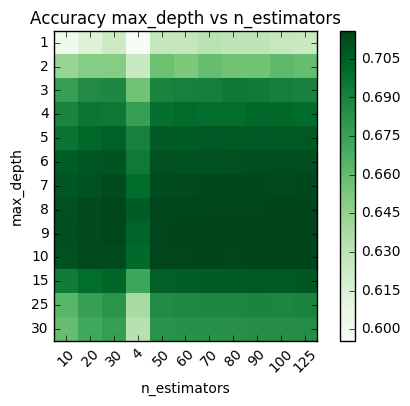

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Cross Validation mean : 0.648963172799
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Cross Validation mean : 0.648525225374


In [29]:
#Tune Parameters for Random Forest
max_depth_range = np.array([1, 2, 3,4,5,6,7,8,9,10,15,25,30 ])
n_estimators_range = np.array([10, 20, 30,4,50,60,70,80,90,100,125])
param_grid= {'max_depth' : max_depth_range,'n_estimators' : n_estimators_range}

clf = RandomForestClassifier(n_estimators=10, max_depth=None)

Grid = GridSearchCV(clf, param_grid=param_grid, n_jobs=4, scoring='roc_auc')
        
Grid.fit(X_train,Y_train)

Result_gridS(max_depth_range, n_estimators_range, 'max_depth', 'n_estimators', Grid.grid_scores_)
plt.show()

top_clf = Grid.best_estimator_
print(top_clf)
print()
Y_result=top_clf.predict(X_test_leaderboard)
scores = cross_val_score(top_clf, X_train,Y_train)
print("Cross Validation mean :",scores.mean())

top_depth=Grid.best_params_['max_depth']
top_estimators=Grid.best_params_['n_estimators']

max_depth_range_2=np.arange(top_depth-1,top_depth+1,1)
n_estimators_range_2=np.arange(top_estimators-1,top_estimators+1,1)

param_grid_2= {'max_depth' : max_depth_range_2,'n_estimators' : n_estimators_range_2}

Grid = GridSearchCV(clf, param_grid=param_grid_2, n_jobs=4, scoring='roc_auc')

Grid.fit(X_train,Y_train)


top_clf = Grid.best_estimator_
print(top_clf)

Y_result=top_clf.predict(X_test_leaderboard)
scores = cross_val_score(top_clf, X_train,Y_train)
print("Cross Validation mean :",scores.mean())

In [ ]:
#Tune Parameters Random Forest on hidden database
max_depth_range = np.array([1, 2, 3, 4,5,6,7,8,9,10 ])
n_estimators_range = np.array([10, 20, 30, 40,50,60,70,80,100])
param_grid= {'max_depth' : max_depth_range,'n_estimators' : n_estimators_range}

clf = RandomForestClassifier(n_estimators=10, max_depth=None)

Grid = GridSearchCV(clf, param_grid=param_grid, n_jobs=4, scoring='roc_auc')
        
Grid.fit(X_train,Y_train)

Result_gridS(max_depth_range, n_estimators_range, 'max depth', 'n estimators', Grid.grid_scores_)
plt.show()

top_clf = Grid.best_estimator_
print(top_clf)

Y_result=top_clf.predict(X_test)
print(top_clf.score(X_test, Y_test),"clf_score")
scores = cross_val_score(top_clf, X_train, Y_train)
print(scores.mean())

# Gradient Boosting

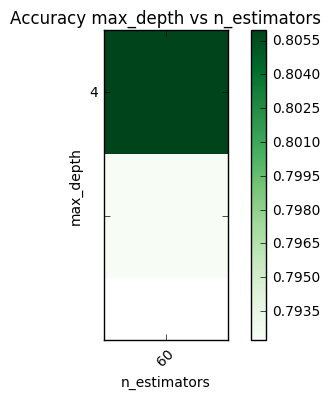

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.10000000000000001, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
0.720740120753


In [16]:
#Tune Parameters for Gradient Boosting
max_depth_range = np.array([4])
n_estimators_range = np.array([60])
learning_rate_range =  np.array([ 0.1,0.2 ])
param_grid= {'max_depth' : max_depth_range,'n_estimators' : n_estimators_range,'learning_rate':learning_rate_range}

clf = GradientBoostingClassifier(n_estimators=10, max_depth=None)

Grid = GridSearchCV(clf, param_grid=param_grid, n_jobs=4, scoring='roc_auc')
        
Grid.fit(X_train,Y_train)

Result_gridS_GB(max_depth_range, n_estimators_range, learning_rate_range,'max_depth', 'n_estimators','learning_rate', Grid.grid_scores_)
plt.show()

top_clf = Grid.best_estimator_
print(top_clf)

Y_result=top_clf.predict(X_test_leaderboard)
scores = cross_val_score(top_clf, X_train,Y_train)
print(scores.mean())

#top_depth=Grid.best_params_['max_depth']
#top_estimators=Grid.best_params_['n_estimators']
#top_learning_rate=Grid.best_params_['learning_rate']
#max_depth_range_2=np.arange(top_depth-2,top_depth+2,1)
#n_estimators_range_2=np.arange(top_estimators-2,top_estimators+2,1)
#n_learning_rate_range_2=np.arange(top_learning_rate-(top_learning_rate/2),top_learning_rate+(top_learning_rate/2),(top_learning_rate/2))
#param_grid_2= {'max_depth' : max_depth_range_2,'n_estimators' : n_estimators_range_2,'learning_rate':n_learning_rate_range_2}

#Grid = GridSearchCV(clf, param_grid=param_grid_2, n_jobs=4, scoring='roc_auc')

#Grid.fit(X_train,Y_train)


#top_clf = Grid.best_estimator_
#print(top_clf)

#Y_result=top_clf.predict(X_test_leaderboard)
#scores = cross_val_score(top_clf, X_train,Y_train)
#print(scores.mean())


In [ ]:
#Tune Parameters for Gradient Boosting on hidden database
max_depth_range = np.array([1,2,3,4,5,6])
n_estimators_range = np.array([10, 20,30,40])
learning_rate_range =  np.array([ 0.01,0.1 ])
param_grid= {'max_depth' : max_depth_range,'n_estimators' : n_estimators_range,'learning_rate':learning_rate_range}

clf = GradientBoostingClassifier(n_estimators=10, max_depth=None)

Grid = GridSearchCV(clf, param_grid=param_grid, n_jobs=4, scoring='roc_auc')
        
Grid.fit(X_train,Y_train)

Result_gridS_GB(max_depth_range, n_estimators_range, learning_rate_range,'max_depth', 'n_estimators','learning_rate', Grid.grid_scores_)
plt.show()

top_clf = Grid.best_estimator_
print(top_clf)

Y_result=top_clf.predict(X_test_leaderboard)
scores = cross_val_score(top_clf, X_train,Y_train)
print(scores.mean())


# FEATURE SELECTION WITH RFECV

Optimal number of features : 6
[1 1 2 1 1 1 1]


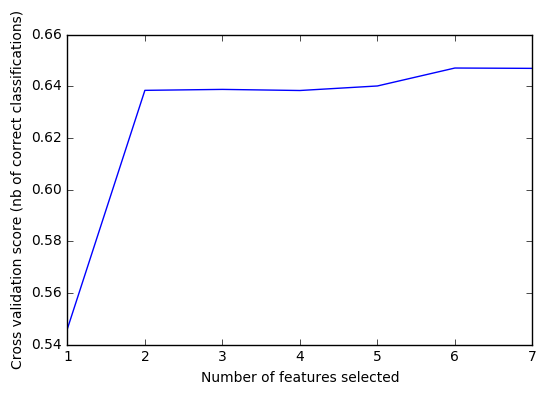

In [34]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


clf = RandomForestClassifier(n_estimators=80, max_depth=9)

Rfe=RFECV(estimator=clf, step=1,scoring='accuracy',cv=StratifiedKFold(2))    
Rfe.fit(X_train,Y_train)
print("Optimal number of features : %d" % Rfe.n_features_)

print(Rfe.ranking_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(Rfe.grid_scores_) + 1), Rfe.grid_scores_)
plt.show()

Y_result=Rfe.predict(X_test_leaderboard)


#  Export Function Y_result

In [18]:
def final_rendu(Y_result):
    index=range(len(Y_result))
    columns=['ID Joueur 1','ID Joueur 2','ID Tournoi','ID Round','PREDICT']
    df=pd.DataFrame(index=index,columns=columns)
    df['ID Joueur 1']=X_test_leaderboard['30589']
    df['ID Joueur 2']=X_test_leaderboard['54796']
    df['ID Tournoi']=X_test_leaderboard['13296']
    df['ID Round']=X_test_leaderboard['4']
    Y_result=np.where(Y_result==0,2,1)
    df['PREDICT']=Y_result
    return df

In [19]:
df=final_rendu(Y_result)
df.to_csv('Result_Tennis_260_142f_gb3.csv',header=True, index=None)

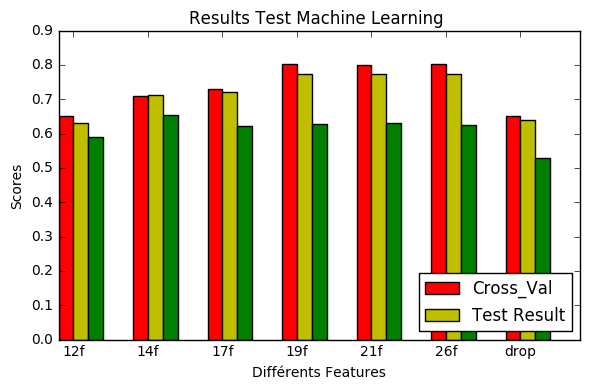

In [33]:
#plt.figure()
n_groups = 7
cross_val = [0.65,0.71,0.73,0.804,0.80,0.802,0.65]

test_val = [0.63,0.712,0.72,0.774,0.773,0.773,0.64]

real_data=[0.59,0.653,0.623,0.628,0.63,0.625,0.53]

fig, ax = plt.subplots()

index = np.arange(n_groups)
width = 0.20


rects1 = plt.bar(index, cross_val,width,color='r')

rects2 = plt.bar(index + width, test_val,width,color='y')

rect3=plt.bar(index+width+width,real_data,width,color='g')
plt.xlabel('Différents Features')
plt.ylabel('Scores')
plt.title('Results Test Machine Learning ')
plt.xticks(index + width, ('12f', '14f', '17f', '19f', '21f','26f','drop'))
plt.legend((rects1[0], rects2[0]), ('Cross_Val', 'Test Result'),loc=4)

plt.tight_layout()
plt.show()

Certains résultats de cross validation avec la base de données privées peuvent être tronquer. En effet, pour certains, j'ai continué de garder les différentes valeurs précédentes % de WIN_TOURNEY,... Ce qui a pour effet de coller trop aux données et d'avoir des resultats trop élévés pour la validation. 

Pour le résultat final, en utilisant une RANDOM FOREST pour les 14 premières features, le score maximal de soumission est 0.653

De nombreux tests de selection defeatures ont été effectués, je ne dépasse jamais les 66% pour les  14 premières features. 